In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

## Reading in Each Dataset

In [2]:
calls_der = pd.read_csv('data/911_calls_der.csv')

In [3]:
calls_tor = pd.read_csv('data/911_calls_tor.csv')

In [4]:
cad_tor = pd.read_csv('data/CAD_data_tor.csv', skiprows = 3)

In [5]:
cad_der = pd.read_csv( 'data/CAD_data_der.csv', skiprows = 3)

In [6]:
zipcodes = gpd.read_file('data/Zip Codes.geojson')

## Changing Column Names

In [7]:
calls_der = calls_der.rename(columns = {'Seizure DateTime':'date_time', 'CallTypeId':'call type', 'ALI Latitude':'lat',
                                        'ALI Longitude': 'lng', 'Cell Tower Address':'cell tower address'})

In [8]:
calls_tor = calls_tor.rename(columns = {'Seizure DateTime':'date_time', 'CallTypeId':'CallType', 'ALI Latitude':'lat',
                                        'ALI Longitude':'lng', 'Cell Tower Address': 'cell_tower_address'})

In [9]:
cad_der = cad_der.rename(columns = {'IncidentDate':'incident_date', 'Latitude1':'lat', 'Longitude1': 'lng',
                                   'IncidentTypeDescription1':'incident_type'})

In [10]:
cad_tor = cad_tor.rename(columns = {'IncidentDate':'incident_date', 'Location':'location', 'Latitude1':'lat',
                                    'Longitude1':'lng','IncidentTypeDescription1':'incident_type'})

## Changing each DataFrame into a GeoDataFrame

In [11]:
calls_der['geometry'] = calls_der.apply(lambda x: Point((float(x.lng),
                                                        float(x.lat))),
                                       axis=1)
calls_der.head(2)

,date_time,call type,lat,lng,cell tower address,geometry
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.716847 36.247802)
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (-86.80062099999999 36.14310800000001)


In [12]:
calls_tor['geometry'] = calls_tor.apply(lambda x: Point((float(x.lng),
                                                        float(x.lat))),
                                       axis=1)
calls_tor.head(2)

,date_time,CallType,lat,lng,cell_tower_address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.665779 36.072708)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.841904 36.159634)


In [13]:
cad_tor['geometry'] = cad_tor.apply(lambda x: Point((float(x.lng),
                                                    float(x.lat))),
                                   axis=1)
cad_tor.head(2)

,incident_date,location,lat,lng,incident_type,geometry
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89405212 36.18200191)
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89497756999999 36.175666)


In [14]:
cad_der['geometry'] = cad_der.apply(lambda x: Point((float(x.lng),
                                                    float(x.lat))),
                                   axis=1)
cad_der.head(2)

,incident_date,Location,lat,lng,incident_type,geometry
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD,POINT (-86.96252641 36.04687715)
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD,POINT (-86.94067952 36.08249081)


## Looking at data in Zipcodes

In [17]:
print(zipcodes.crs)
zipcodes.head()

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


<AxesSubplot:>

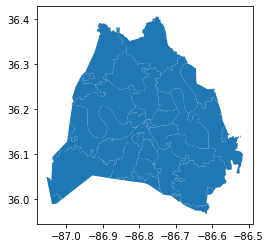

In [18]:
zipcodes.plot()

## Creating GeoDataFrames

In [37]:
calls_der_geo = gpd.GeoDataFrame( calls_der,
                                crs = zipcodes.crs,
                                geometry = calls_der['geometry'])
print(type(calls_der_geo))
calls_der_geo.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,date_time,call type,lat,lng,cell tower address,geometry
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.71685 36.24780)
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (-86.80062 36.14311)


In [36]:
calls_tor_geo = gpd.GeoDataFrame(calls_tor,
                                crs = zipcodes.crs,
                                geometry = calls_tor['geometry'])
print(type(calls_tor_geo))
calls_tor_geo.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,date_time,CallType,lat,lng,cell_tower_address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.66578 36.07271)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.84190 36.15963)


In [35]:
cad_der_geo = gpd.GeoDataFrame(cad_der,
                              crs = zipcodes.crs,
                              geometry = cad_der['geometry'])
print(type(cad_der_geo))
cad_der_geo.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,incident_date,Location,lat,lng,incident_type,geometry
0,5/3/2020 4:31:07 PM,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD,POINT (-86.96253 36.04688)
1,5/3/2020 4:32:18 PM,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD,POINT (-86.94068 36.08249)


In [34]:
cad_tor_geo = gpd.GeoDataFrame(cad_tor,
                              crs = zipcodes.crs,
                              geometry = cad_tor['geometry'])
print(type(cad_tor_geo))
cad_tor_geo.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,incident_date,location,lat,lng,incident_type,geometry
0,3/3/2020 12:36:34 AM,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89405 36.18200)
1,3/3/2020 12:37:24 AM,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89498 36.17567)


## Joining DataFrames